#**Implementing and Evaluating Naive Bayes Classifier for Text Classification**

#**1. Loading and Preparing Data:**

*   Dataset Loading:

In [76]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='train')

*   Extracting Text Data and Labels:

In [67]:
text_data = data.data
target_labels = data.target

*   Display Sample Data:

In [68]:
print("Sample text data and their corresponding target labels:")
for i in range(3):
    print(f"Text {i}: {text_data[i][:500]}...")
    print(f"Label {i}: {target_labels[i]}\n")

Sample text data and their corresponding target labels:
Text 0: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a m...
Label 0: 7

Text 1: From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please 

*   Create and Display Table:

In [69]:
import pandas as pd
df = pd.DataFrame({'Text': text_data[:5], 'Label': target_labels[:5]})
print(df)

                                                Text  Label
0  From: lerxst@wam.umd.edu (where's my thing)\nS...      7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...      4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...      4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...      1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...     14


#**2. Vectorizing the Text Data:**

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_data = vectorizer.fit_transform(text_data)

#**3. Splitting the Data:**

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tfidf_data, target_labels, test_size=0.2, random_state=999)

#**4. Training and Evaluating a Multinomial Naive Bayes Model:**

In [72]:
from sklearn.naive_bayes import MultinomialNB
clf_mn = MultinomialNB()
clf_mn.fit(X_train, y_train)
score = clf_mn.score(X_val, y_val)
print("Scikit-learn Model accuracy: ", score)

Scikit-learn Model accuracy:  0.8166151126822802


#**5. Custom Implementation of Multinomial Naive Bayes:**

In [73]:
import numpy as np

class CustomMultinomialNB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Smoothing parameter

    def fit(self, X, y):
        m, n = X.shape  # m documents, n features
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Initialize prior probabilities and likelihoods
        self.prior = np.zeros(n_classes)
        self.likelihood = np.zeros((n_classes, n))

        # Calculate prior probabilities and likelihoods
        for idx, cls in enumerate(self.classes):
            X_cls = X[y == cls]
            total_cls_count = X_cls.sum() + self.alpha * n  # Total count + smoothing
            self.prior[idx] = np.log(X_cls.shape[0] / m)  # log P(c)
            self.likelihood[idx] = np.log((X_cls.sum(axis=0) + self.alpha) / total_cls_count)  # log P(x_i | c)
    
    def predict_log_proba(self, X):
        # Calculate log probabilities (posterior) for each class
        return X @ self.likelihood.T + self.prior
    
    def predict(self, X):
        # Predict the class with the highest log probability (posterior)
        log_posterior= self.predict_log_proba(X)
        return self.classes[np.argmax(log_posterior, axis=1)]
    
    def score(self, X, y):
        # Calculate accuracy
        predictions = self.predict(X)
        return np.mean(predictions == y)

#**6. Training and Evaluating the Custom Model:**

In [74]:
clf_mn2 = CustomMultinomialNB()
clf_mn2.fit(X_train, y_train)
score2 = clf_mn2.score(X_val, y_val)
print("Our Model accuracy: ", score2)

Our Model accuracy:  0.8166151126822802


#**7. Comparing Results**

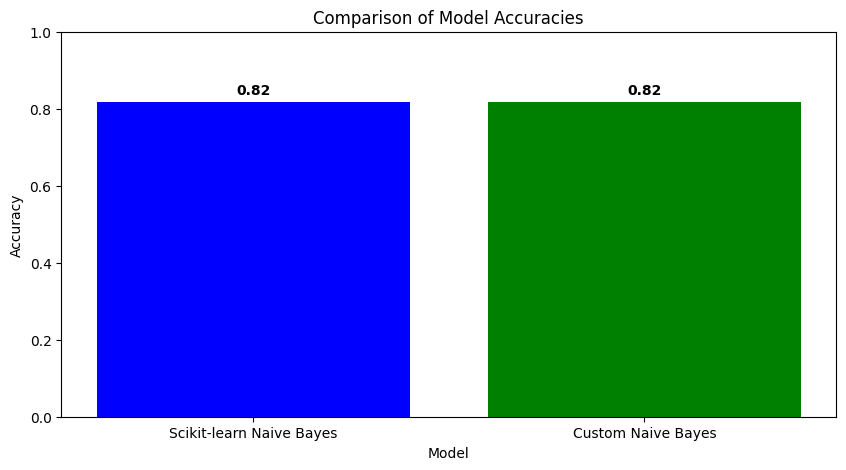

In [75]:
import matplotlib.pyplot as plt

model_names = ['Scikit-learn Naive Bayes', 'Custom Naive Bayes']
accuracies = [score, score2]

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()